In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy as sp
from scipy import signal as sl

In [2]:
## open file and create the year, month and # of sunspots 
filename = "1713.txt" 
filepath = "/eos/home-t/toisidor/SWAN_projects/sunspots/" 
file = filepath+filename
print(file)
f=open(file,"r")
lines=f.readlines()
month=[]
spots = [] 
year=[]

for x in lines:
    year.append(x.split(' ')[0])
    month.append(x.split(' ')[1])
    spots.append(float(x.split()[3]))
f.close()

# Normalize number of sunspots
s = spots - np.mean(spots)
norm = np.linalg.norm(s)
normal_spots = s/norm
print(normal_spots)

/eos/home-t/toisidor/SWAN_projects/sunspots/1713.txt
[-0.02274868 -0.02274868 -0.02274868 ... -0.02274868 -0.02274868
 -0.02274868]


Text(0.5, 1.0, 'Sunspots vector')

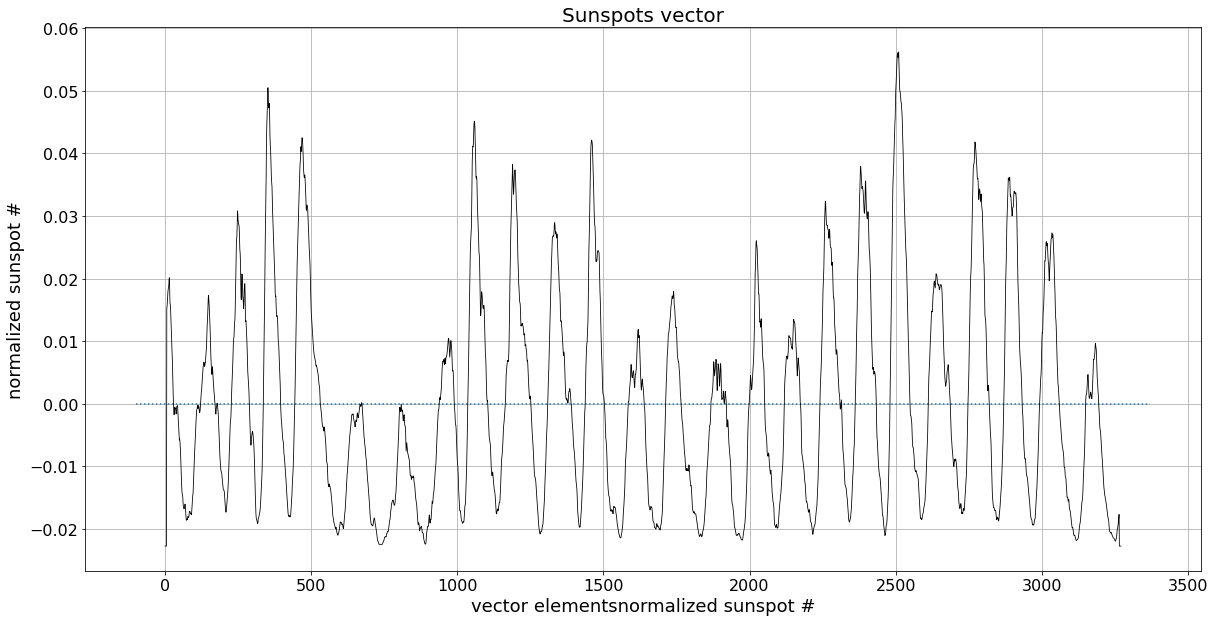

In [3]:
## Plot normalized number of sunspots 
spotsmean =np.mean(spots)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)

ax.plot(normal_spots,color='black',linewidth='0.8')
ax.hlines(0, -100, len(normal_spots)+100, colors=None, linestyles='dotted', label='')
ax.grid()
ax.set_xlabel('vector elementsnormalized sunspot #', fontsize=18)
ax.set_ylabel('normalized sunspot #', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_title('Sunspots vector', fontsize=20)

In [11]:
## Create the matrices and filled them with the elements of the sunspots vector
## The code does it as a function of the set binning (L)
## calculate rho

a = [] 
K = [] 
M = []
M_t = []
rho = dict() 

min_bin = 1
max_bin = 151
steps = 5

import math 
for L in range(min_bin,max_bin,steps):
    M = []
    M_t = []
    print("....progress: L = {}".format(L))
    M = ([[0 for x in range(L)] for y in range(int(len(normal_spots)/L)+1)])
    M_t = ([[0 for x in range(int(len(normal_spots)/L)+1)] for y in range(L)])
    
    for j in range(len(normal_spots)): 
        a_tmp = j%L
        k_tmp = math.floor(j/L)
        M[k_tmp][a_tmp] = (normal_spots[j])
        M_t[a_tmp][k_tmp] = (normal_spots[j])
        rho[L] = np.matmul(M_t,M)

....progress: L = 1
....progress: L = 6
()


In [12]:
## Calculate the eigenvalues of rho and find the entropy
W = []
Ent = dict() 

for i in rho.keys():     
    w, v = LA.eig(rho[i])
    W.append(w)
    Ent[i] = -np.nansum(w*np.log(w))

dict_keys([1, 6])


Text(0.5, 1.0, 'Entropy vs binSize')

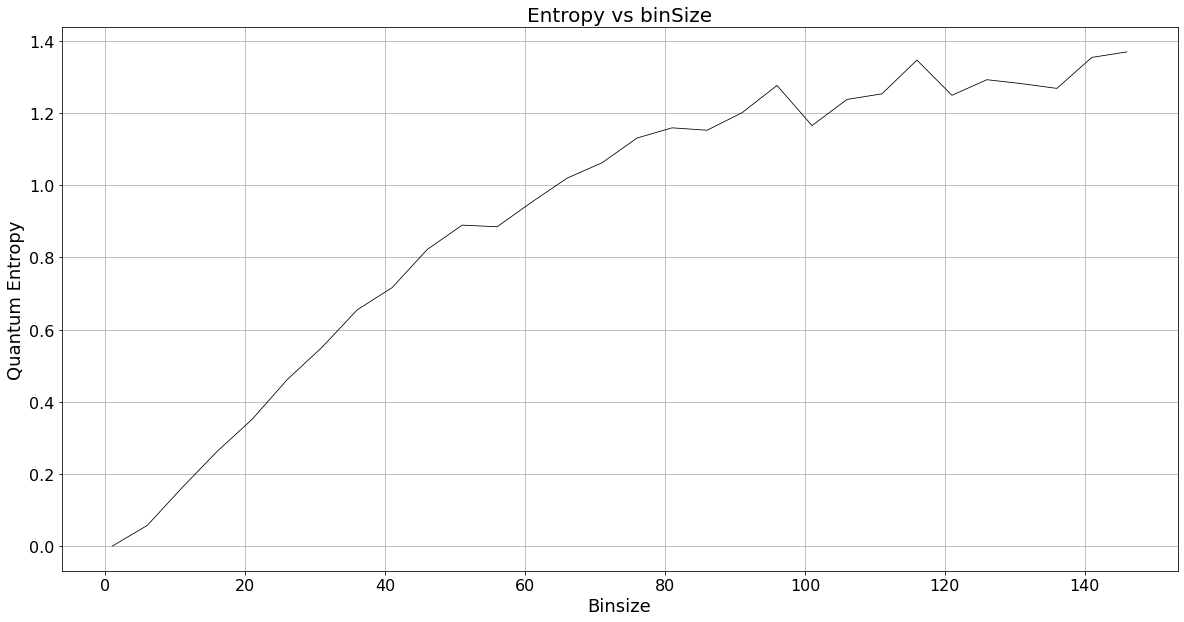

In [107]:
## Plot QM entropy as a function of the bin size
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)

ax.plot(Ent.keys(),Ent.values(),linestyle='-',marker='None', color='black',linewidth=0.8)
ax.grid()
ax.set_xlabel('Binsize', fontsize=18)
ax.set_ylabel('Quantum Entropy', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_title('Entropy vs binSize', fontsize=20)

In [116]:
## Fix the binning and recalculate rho
import math

a = [] 
K = [] 
M = []
M_t = []
rho = [] 

L=101

M = ([[0 for x in range(L)] for y in range(int(len(normal_spots)/L)+1)])
M_t = ([[0 for x in range(int(len(normal_spots)/L)+1)] for y in range(L)])

for j in range(len(normal_spots)): 
    a_tmp = j%L
    k_tmp = math.floor(j/L)
    M[k_tmp][a_tmp] = (normal_spots[j]) 
    M_t[a_tmp][k_tmp] = (normal_spots[j])
        
rho = np.matmul(M_t,M)

/cvmfs/sft.cern.ch/lcg/views/LCG_100/x86_64-centos7-gcc8-opt/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Entropy vs binSize')

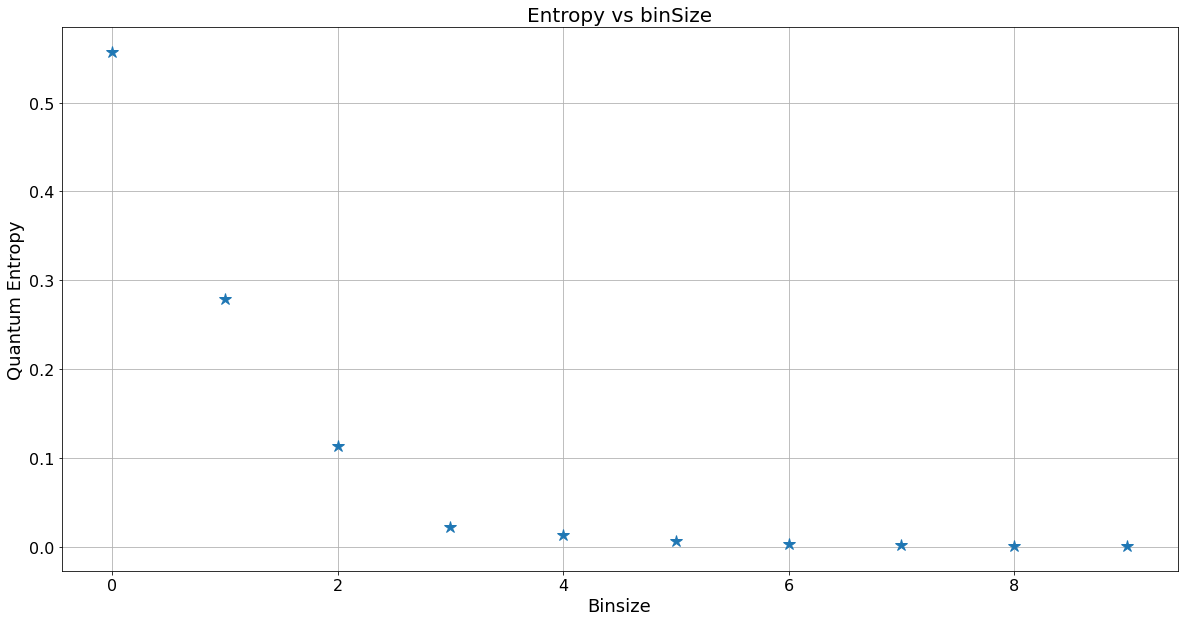

In [121]:
## find rho eigenvalues and eigenvectors and plot eigenvalues as a function of the eignevector # 
from numpy import linalg as LA
w, v = LA.eig(rho)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)

ax.plot(w[:10],linestyle='None',marker='*', markersize='13')
ax.grid()
ax.set_xlabel('Eigenvector number', fontsize=18)
ax.set_ylabel('Eigenvalue', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_title('Eigenvalues', fontsize=20)

In [160]:
##Under Development

# v_t = v[1].transpose()
# print(v_t)
# T = np.matmul(v[1],v_t)

# print(T)


# A = np.matmul(M_t,T)
# C = np.linalg.svd(rho, full_matrices=True, compute_uv=True, hermitian=False)

[-7.09622829e-02+0.j          1.74342819e-02+0.j
  1.82642649e-01+0.j          2.52145508e-01+0.j
 -1.03400833e-01+0.j         -2.27587141e-01+0.j
 -5.68949200e-02+0.j          4.13780114e-03+0.j
  2.54390971e-02+0.j          2.97446654e-02+0.j
  6.69258597e-02+0.j         -1.44611456e-01+0.j
  4.13172298e-02+0.j          1.62550334e-01+0.j
 -1.16409863e-01+0.j         -1.31384018e-02+0.j
 -1.37171828e-01+0.j          1.09823686e-01+0.j
 -3.43074902e-02+0.j          8.99961405e-02+0.j
 -3.87636633e-02+0.j         -6.48262763e-02+0.j
  5.24469329e-02+0.j          7.64908473e-02+0.j
  2.78547432e-02+0.j         -4.28193824e-03+0.j
 -1.86033580e-02+0.j         -1.10370937e-02+0.j
 -5.69907511e-02+0.j          1.24665174e-01+0.j
 -5.06949623e-02+0.j         -1.76074921e-01+0.j
 -1.30580182e-01+0.j         -1.26981156e-01+0.j
 -2.56226672e-02+0.j          3.11857373e-02+0.j
  1.74449212e-02+0.03379862j  1.74449212e-02-0.03379862j
 -3.18788587e-02+0.j         -3.34508985e-02+0.j
 -1.99059611

ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [164]:
## Still need to be done:: 
